In [1]:
# 구글 드라이브 연결 테스트 셋 https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls
!ls "/gdrive/My Drive/Colab Notebooks/" # 드라이브에 들어가 있는 dataset.zip 확인

sample_data
'[13] 전이학습 (1).ipynb'			    '[8]CNN활용.ipynb'
'[13] 전이학습.ipynb'				     dataset.zip
'[14]CNN이진분류.ipynb'				     DCGAN.ipynb
'[15]ML_캘리포니아집값예측_모형저장까지 (1).ipynb'   DL
'[15]ML_캘리포니아집값예측_모형저장까지.ipynb'	     Untitled
'[1]SVM-checkpoint.ipynb'			     Untitled0.ipynb
'[1]SVM.ipynb'					    'Untitled1 (1).ipynb'
'[25-2]U-NET(모델적용)_최유리.ipynb'		     Untitled1.ipynb
'[25-2]U-NET(모델적용)_최유리.ipynb의 사본'	     Untitled2.ipynb
'[25]U-NET02_model.ipynb'


In [3]:
import zipfile as zf
files = zf.ZipFile("/gdrive/My Drive/Colab Notebooks/dataset.zip",'r') # 기존 ZIP 압축 파일의 자료 읽기
files.extractall()
files.close()

In [4]:
!ls

dataset  sample_data


In [5]:
import os
os.listdir(os.path.join(os.getcwd(), "dataset")) # 항목이름 리스트 반환

['metal', 'glass', 'plastic', 'trash', 'cardboard', 'paper']

In [6]:
from pathlib import Path
path = Path(os.getcwd())/"dataset"
path

PosixPath('/content/dataset')

In [7]:
# train, valid, test 구조로 분할하는 함수
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    # train 인덱싱
    random.seed(seed1)
    train = random.sample(list(range(1,n+1)), int(.5*n)) # 50%를 train 폴더로 이동
    remain = list(set(full_set)-set(train))

    # valid 인덱싱
    random.seed(seed2)
    valid = random.sample(remain, int(.5*len(remain))) # 남은 것들 중 50%(전체 25%)를 valid 폴더로 이동
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

# 인덱싱에 따라 파일 이름을 구하기
def get_names(waste_type, indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)

# 파일의 위치를 옮기는 함수
def move_files(source_files, destination_folder):
    for file in source_files:
        shutil.move(file, destination_folder)

In [8]:
import random
import shutil

# 데이터 종류 / 쓰레기 타입 설정
subsets = ['train','valid']
waste_types = ['cardboard','glass','metal','paper','plastic','trash']

# data/데이터 종류/쓰레기 타입 디렉토리가 존재하지 않으면 폴더를 생성한다.
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data', subset, waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)

# test 폴더는 쓰레기 타입 디렉토리가 포함되지 않으므로 따로 작성
if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))
            
# 각 쓰레기 타입별로 
for waste_type in waste_types:
    source_folder = os.path.join('dataset', waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    # 파일들을 train 폴더로 옮김
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    move_files(train_source_files, "data/train/" + waste_type)
    
    # 파일들을 valid 폴더로 옮김
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    move_files(valid_source_files, "data/valid/" + waste_type)
    
    # 파일들을 test폴더로 옮김
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    move_files(test_source_files,"data/test")    # test 폴더는 쓰레기 타입 미포함

In [10]:
# 변경된 디렉토리 구조 확인
!ls
!ls data

data  dataset  drive  sample_data
test  train  valid


In [11]:
from fastai.vision.all import *

path = Path(os.getcwd())/"data"
#tfms = get_transforms(do_flip=True, flip_vert=True)  # 데이터셋 변형 함수 데이터를 좌우로 반전시키거나 밝기를 조절 -> 사라진 함수
#data = ImageDataBunch.from_folder(path, test="test", ds_tfms=tfms, bs=16) # 파일을 담은 리스트 생성 함수 -> 사라진 함수
data = ImageDataLoaders.from_folder(path, test="test", bs=16) # 파일을 담은 리스트 생성
data

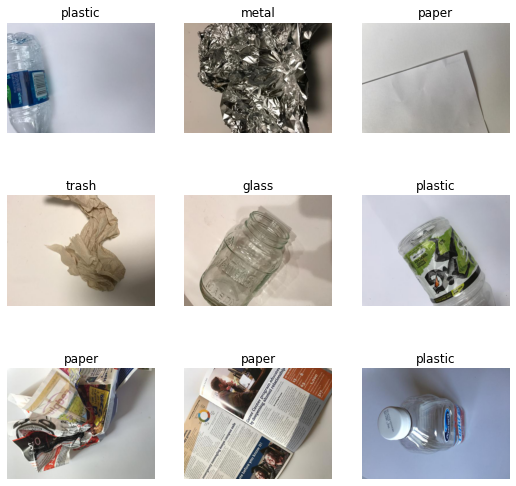

In [12]:
data.show_batch() #랜덤하게 데이터 보기

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
# fastai에서 이미 학습된 모델을 가져온다. 모델링은 resnet34, 평가지표는 에러율(error_rate) 

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pt

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0019498446490615606)

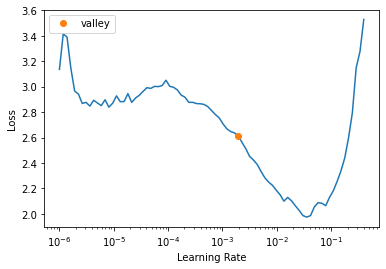

In [14]:
learn.lr_find(start_lr=1e-6, end_lr=1e1) # lr_find = 가장 적합한 lr을 찾아주는 메서드 https://velog.io/@mn99134/%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8

In [16]:
#learn.recorder.plot(suggestion=True) # 학습률과 손실을 플로팅 recorder 도 없어진 메소드
#learn.fit_one_cycle(20, max_lr=9.77E-03) # fit()보다 속도와 정확성 측면에서 좋은 메소드 이것도 없어짐
learn.fine_tune(12, 3e-3) # fine_tune: 사전 학습된 모델을 새로운 데이터셋에 적응시키는 메소드

epoch,train_loss,valid_loss,error_rate,time
0,1.313344,0.577505,0.179365,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.566553,0.358119,0.100000,00:28
1,0.377911,0.497493,0.134921,00:27
2,0.410842,0.747329,0.176190,00:26
3,0.437177,0.628617,0.160317,00:27
4,0.366816,0.420327,0.123810,00:27
5,0.208156,0.417995,0.096825,00:27
6,0.218422,0.366474,0.096825,00:26
7,0.126396,0.494715,0.112698,00:26
8,0.103471,0.305654,0.065079,00:27
9,0.058306,0.274852,0.063492,00:26


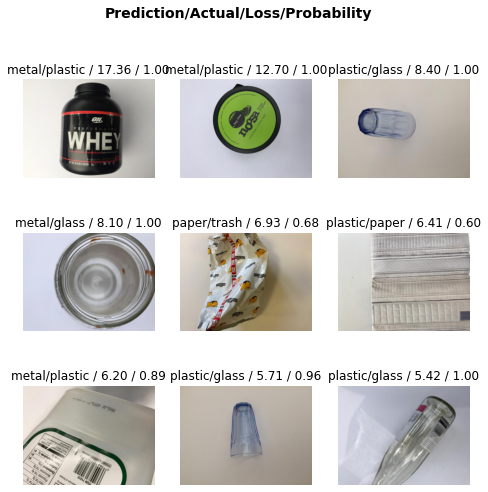

In [17]:
# loss 값이 큰 것들 순서대로 표시
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(8,8))

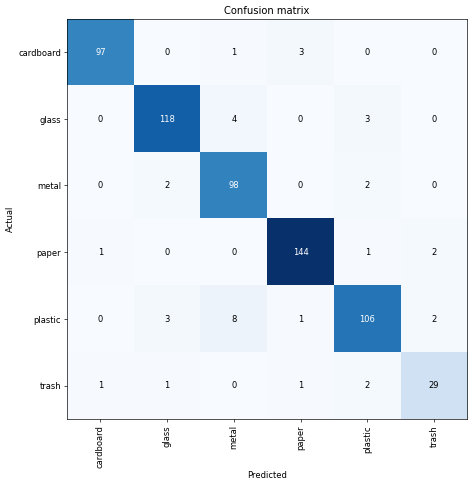

In [18]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [19]:
# 가장 혼동되는 조합 정렬
interp.most_confused()

[('plastic', 'metal', 8),
 ('glass', 'metal', 4),
 ('cardboard', 'paper', 3),
 ('glass', 'plastic', 3),
 ('plastic', 'glass', 3),
 ('metal', 'glass', 2),
 ('metal', 'plastic', 2),
 ('paper', 'trash', 2),
 ('plastic', 'trash', 2),
 ('trash', 'plastic', 2),
 ('cardboard', 'metal', 1),
 ('paper', 'cardboard', 1),
 ('paper', 'plastic', 1),
 ('plastic', 'paper', 1),
 ('trash', 'cardboard', 1),
 ('trash', 'glass', 1),
 ('trash', 'paper', 1)]

**테스트데이터**

In [55]:
dir(data)

['_DataLoader__idxs',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_tfms',
 '_after_item',
 '_call',
 '_component_attr_filter',
 '_component_attr_filter',
 '_component_attr_filter',
 '_dbunch_type',
 '_dbunch_type',
 '_decode_batch',
 '_default',
 '_default',
 '_default',
 '_device',
 '_dir',
 '_dir',
 '_dir',
 '_dl_type',
 '_dl_type',
 '_do_call',
 '_docs',
 '_docs',
 '_get',
 '_is_showable',
 '_methods',
 '_n_inp',
 '_name',
 '_new',
 '_new',
 '_noop_methods',
 '_one_pass',
 '_pre_show_batch',
 '_repr_pretty_',
 '_retain_dl',
 '_set',
 '_types',
 'add',
 'add_na',
 'add_tfms',
 'after_batch',
 'afte

In [59]:
learn.dls.vocab # 클래스 확인

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [60]:
learn.dls.c # 클래스 개수 확인

6

In [20]:
preds = learn.get_preds()
print(preds[0].shape)
print(preds[0])

torch.Size([630, 6])
TensorBase([[1.7431e-08, 9.3749e-07, 9.9999e-01, 1.5968e-06, 2.0161e-07,
             5.4999e-06],
            [8.1477e-08, 4.0773e-07, 9.9998e-01, 5.4905e-08, 1.5515e-05,
             3.5870e-06],
            [2.9727e-07, 3.8547e-07, 9.9999e-01, 5.1936e-09, 5.0909e-06,
             2.7002e-07],
            ...,
            [6.0477e-04, 2.0480e-06, 4.9327e-06, 9.9926e-01, 1.2062e-04,
             3.0178e-06],
            [2.4739e-04, 1.0503e-04, 3.5364e-06, 9.9932e-01, 1.8446e-04,
             1.3579e-04],
            [1.3807e-03, 2.9813e-02, 2.2087e-05, 9.6875e-01, 2.1055e-05,
             1.7814e-05]])


In [21]:
# 각 이미지에 예측된 class의 번호를 부여
max_idxs = np.asarray(np.argmax(preds[0],axis=1))
max_idxs

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 5, 4, 4, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 1, 4, 4,

In [61]:
# 부여된 번호를 토대로 class의 이름을 부여
yhat = []
for max_idx in max_idxs:
    yhat.append(learn.dls.vocab[max_idx])
print(yhat)

['metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'plastic', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'glass', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'plastic', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'glass', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glas

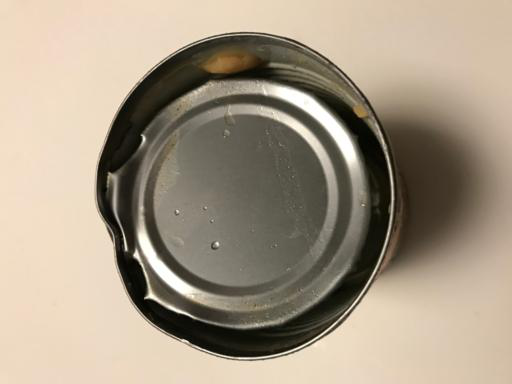

In [39]:
# 첫번째 test 데이터의 이미지 확인
data.valid_ds[0][0]

In [41]:
y = []
# 각 이미지 파일의 경로를 저장
for label_path in data.valid_ds.items:
    y.append(str(label_path))

# 파일 이름을 통해 정답값을 추출.
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

print(y)

['metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 

In [42]:
# 예측값
print(yhat[0:5])
# 실제값
print(y[0:5])

['metal', 'metal', 'metal', 'metal', 'metal']
['metal', 'metal', 'metal', 'metal', 'metal']


[[ 97   0   1   3   0   0]
 [  0 118   4   0   3   0]
 [  0   2  98   0   2   0]
 [  1   0   0 144   1   2]
 [  0   3   8   1 106   2]
 [  1   1   0   1   2  29]]


<Axes: >

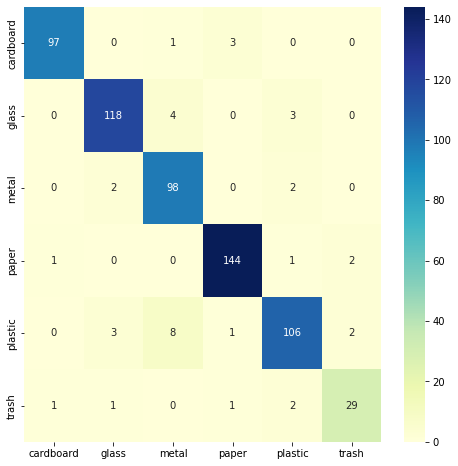

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, yhat)
print(cm)

import seaborn as sns
df_cm = pd.DataFrame(cm, waste_types, waste_types)

plt.figure(figsize=(8,8))
sns.heatmap(df_cm,annot=True, fmt="d", cmap="YlGnBu")

In [44]:
correct = 0

for i in range(len(yhat)) :
    if y[i] == yhat[i] :
        correct += 1

accuracy = correct / len(yhat)
accuracy

0.9396825396825397

In [45]:
# 저장된 폴더를 삭제함.
shutil.rmtree("data")
shutil.rmtree("dataset")

In [46]:
!ls

drive  sample_data
